## 概率分布及 PyMc 初探


简单的说贝叶斯推断其实就是为一些参数设定一个先验分布，然后通过与实际观察数据相结合，来更新这些分布，并且最终得到后验分布的过程。由此可以看出，分布函数在贝叶斯推断中的重要性。因此，本实验，将会着重介绍概率分布函数的分类，并且利用其中一个分布函数，完成用户收发短信行为的推断预测。

In [8]:
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# 定义 possion 函数
poi = stats.poisson
# 定义 两个 lambda 值
lambda_ = [1.5, 4.25]
# 定义 k值为0-15
k = np.arange(16)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [9]:
# 所有的分布函数类中都存在 pmf 函数用于计算相应的概率值
# 通过传入不同的 labmda 值，求出两组概率值
P_lambda_0 = poi.pmf(k, lambda_[0])
P_lambda_1 = poi.pmf(k, lambda_[1])
P_lambda_0, P_lambda_1

(array([2.23130160e-01, 3.34695240e-01, 2.51021430e-01, 1.25510715e-01,
        4.70665182e-02, 1.41199554e-02, 3.52998886e-03, 7.56426185e-04,
        1.41829910e-04, 2.36383183e-05, 3.54574774e-06, 4.83511056e-07,
        6.04388819e-08, 6.97371715e-09, 7.47183980e-10, 7.47183980e-11]),
 array([1.42642339e-02, 6.06229941e-02, 1.28823862e-01, 1.82500472e-01,
        1.93906751e-01, 1.64820739e-01, 1.16748023e-01, 7.08827284e-02,
        3.76564495e-02, 1.77822122e-02, 7.55744020e-03, 2.91992008e-03,
        1.03413836e-03, 3.38083695e-04, 1.02632550e-04, 2.90792226e-05]))

Text(0.5, 1.0, 'Probability mass function of a Poisson random variable; differing $\\lambda$ values')

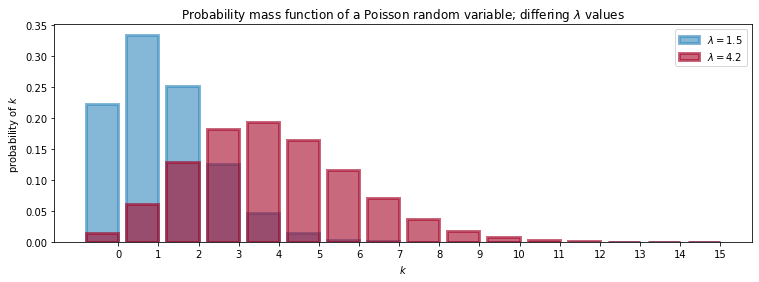

In [10]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
# 设置所画图像的大小
figsize(12.5, 4)
# 将两个lambda对应的概率设置为两种，不同的值
colours = ["#348ABD", "#A60628"]


plt.bar(k, P_lambda_0, color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(k, P_lambda_1, color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(k + 0.4, k)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values")

Text(0.5, 1.0, 'Probability density function of an Exponential random variable; differing $\\lambda$')

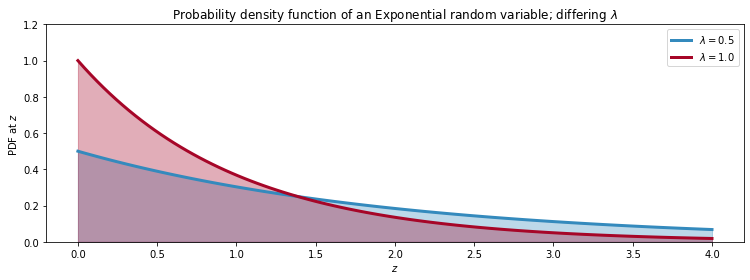

In [11]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
# 设置y轴范围
plt.ylim(0, 1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$")

什么是 𝜆
这个问题，我们可以理解为统计的动机是什么。在现实世界中，我们并不知道 𝜆 的存在，我们能直观感受的就是变量 𝑍。因此，为了确定参数 𝜆，我们就必须深入到整个事件的背景中去。这个问题，其实很难，因为并不存在 𝑍 到 𝜆 的对应公式。

对于 𝜆 的估计有很多设计好的方法，但因为 𝜆 不是一个可以真正观察到的东西。因此，谁也不能说哪一种方法是最好的。

贝叶斯推断提出，就是为了对 𝜆 取值进行估计。与其不断的猜测 𝜆 的精确取值，不如用一个概率分布来描述 𝜆 的可能取值。

这看起来或许有些奇怪。毕竟，𝜆 是一个定值，它不一定是随机的！我们怎么能对一个非随机变量值赋予一个概率呢？不，这样的思维方式其实是老旧的频率派的思考方式。在贝叶斯的哲学体系下，我们可以通过所统计的数据，对 𝜆 赋予概率值（后面会详细阐述）。因此，对参数 𝜆 估计是完全可以接受的。

总结一下，贝叶斯推断的主要思路，就是先给  𝜆  赋上一个先验分布，然后找到我们能观测到的数据和  𝜆  之间的关系式，进而建立模型。然后将我们观测到的数据集放入模型中进行训练，最后得到  𝜆  的后验分布。

(0.0, 74.0)

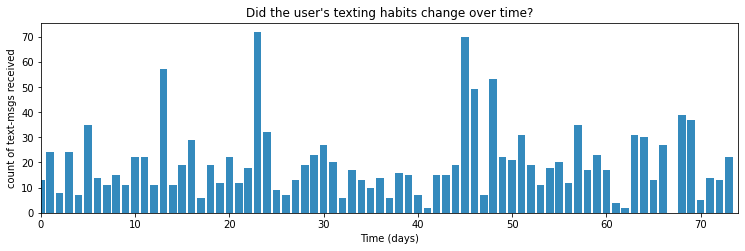

In [31]:
count_data = [13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
        57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
         7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
        15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
        19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
        13., 27.,  0., 39., 37.,  5., 14., 13., 22.]
n_count_data = len(count_data)
n_count_data, count_data
count_data = np.array(count_data)
figsize(12.5, 3.5)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

(0.0, 74.0)

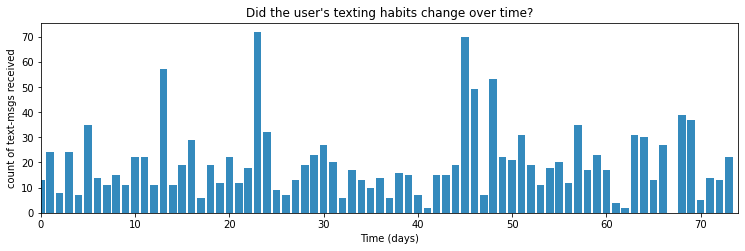

In [32]:
figsize(12.5, 3.5)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

In [33]:
import pymc3 as pm
# 定义一个变量模型，后面的所有随机变量都会写入其中
model = pm.Model()

In [34]:
with model:  # 利用with定义一个上下文管理器，以 model 作为上下文。
           # 在这个上下文中定义的变量都会被添加到这个模型中去

    # α 变量为样本中计算平均值的逆（即倒数的意思）
    alpha = 1.0/count_data.mean()

    # 两个 λ的值都服从指数密度函数分布，函数参数为α
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)

    # τ，即λ发生改变的时间，为 0 - 73 中的任意一天(总共74天)
    # 因为τ是代表的天数，是离散的，这里通过 DiscreteUniform 设置它为离散型变量
    # 即产生随机数
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
model

In [35]:
with model:
    idx = np.arange(n_count_data)  # idf 表示天数
    # lambda_ 表示每天的 λ的值
    # 当小于τ 时为lambda_1 ，大于为lambda_2
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
type(lambda_)

theano.tensor.var.TensorVariable

In [36]:
with model:
    # 将统计数据 与 参数为 lambda_ 的 Poisson 分布相结合。
    observation = pm.Poisson("obs", lambda_, observed=count_data)
type(observation)

pymc3.model.ObservedRV

In [37]:
# 下面代码将在之后的实验中，进行阐述
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step)

/Users/hui/anaconda3/lib/python3.7/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 53 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [38]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']
lambda_1_samples, lambda_2_samples, tau_samples

(array([17.54975818, 17.98919175, 17.98919175, ..., 17.714865  ,
        17.714865  , 17.714865  ]),
 array([21.76707638, 21.76707638, 21.76707638, ..., 22.18731032,
        22.18731032, 23.34592964]),
 array([44, 44, 43, ..., 44, 44, 44]))

Text(0, 0.5, 'probability')

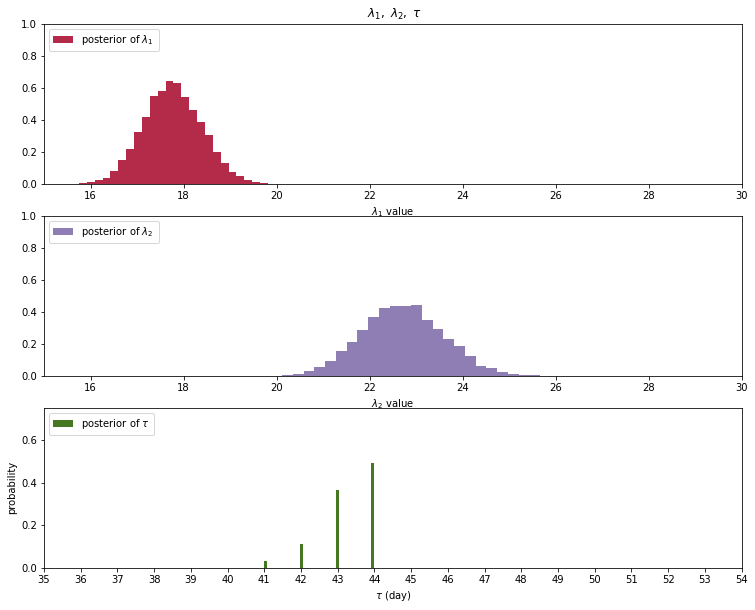

In [40]:
figsize(12.5, 10)
# 下面的代码全为图像可视化代码
# 将图像分为三份，现在ax代表的是第一行第一张
ax = plt.subplot(311)
ax.set_autoscaley_on(False)
# 画出lambda_1 的后验分布
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$ ", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r""" $\lambda_1,\;\lambda_2,\;\tau$ """)
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

# 画出lambda_2 的后验分布
ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$ ", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

# 画出lambda_3的后验分布
plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$ ",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (day)")
plt.ylabel("probability")

回想一下，贝叶斯方法返回一个分布。因此，现在我们可以用分布来描述未知的 $\lambda$ 和 $\tau$。我们也可以从上面的分布中，找到参数的合理值：$\lambda_1$ 大概为 18 和 $\lambda_2$大概为23。这两个$\lambda$ 的后验分布明显不同，这表明用户接受短信的行为确实发生了变化。

我们还可以注意到 $\lambda$ 的后验分布并不像是指数分布。事实上，后验分布并不是我们可以从原始模型中辨别的任何分布。正因如此，我们利用贝叶斯推断出来的不是一个分布的函数值，而是一批分布中的样本点。如果我们改用数学方式处理这个问题，它就会变得棘手和混乱。

In [42]:
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    ix = day < tau_samples
    # 求第 t 天的期望，即所有可能的 lambda 的平均值
    # 当t<tau时，所有lambda2 会为0，则不会将 lambda_2_samples计算进去
    # lambda_1_samples[ix].sum() 和 lambda_2_samples[~ix].sum() 是互斥的
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N
expected_texts_per_day

array([17.76514866, 17.76514866, 17.76514866, 17.76514866, 17.76514866,
       17.76514866, 17.76514866, 17.76514866, 17.76514866, 17.76514866,
       17.76514866, 17.76514866, 17.76514866, 17.76514866, 17.76514866,
       17.76514866, 17.76514866, 17.76514866, 17.76514866, 17.76514866,
       17.76514866, 17.76514866, 17.76514866, 17.76514866, 17.76514866,
       17.76514866, 17.76514866, 17.76514866, 17.76514866, 17.76514866,
       17.76514866, 17.76514866, 17.76514866, 17.76514866, 17.76514866,
       17.76514866, 17.76514866, 17.76514866, 17.76520603, 17.76559303,
       17.7683251 , 17.915249  , 18.42498711, 20.23000556, 22.70826302,
       22.70826302, 22.70826302, 22.70826302, 22.70826302, 22.70826302,
       22.70826302, 22.70826302, 22.70826302, 22.70826302, 22.70826302,
       22.70826302, 22.70826302, 22.70826302, 22.70826302, 22.70826302,
       22.70826302, 22.70826302, 22.70826302, 22.70826302, 22.70826302,
       22.70826302, 22.70826302, 22.70826302, 22.70826302, 22.70

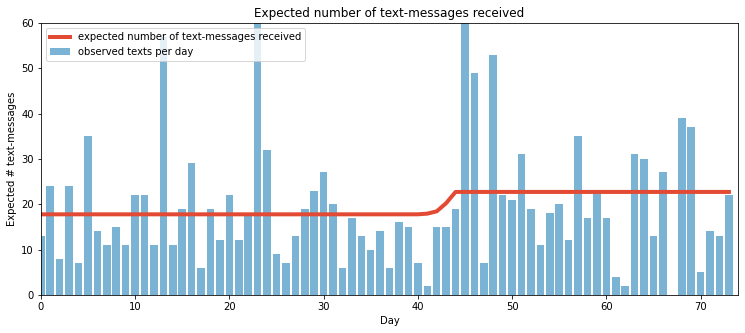

In [43]:
figsize(12.5, 5)
plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left")

####  两个 $\lambda$ 值是否真的一样
一种方法是计算出 $P(\lambda_1<\lambda_2|data)$。即在获得观察数据的前提下，$\lambda_1$ 的真实值比 $\lambda_2$ 小的概率。如果这个概率接近 50% ,那就相当于是投硬币的结果，我们则不能确定这两个 $\lambda$ 值是不同的。如果，这个概率接近 100% ,那么我们就可以很自信的说，这两个值必定不同。 

In [45]:
print((lambda_1_samples < lambda_2_samples).mean())

1.0


In [46]:
for d in [1, 2, 5, 10]:
    v = (abs(lambda_1_samples-lambda_2_samples) >= d).mean()
    print("两个 lambda 之间相差至少{}的概率为 : %{}".format(d, v*100))

两个 lambda 之间相差至少1的概率为 : %99.97500000000001
两个 lambda 之间相差至少2的概率为 : %99.7125
两个 lambda 之间相差至少5的概率为 : %48.105
两个 lambda 之间相差至少10的概率为 : %0.0


本实验主要学习了 Poisson 分布和指数分布。就像我们在短信收发例子中一样，这是接下来构建贝叶斯模型的关键。当然，我们也无需记下这些分布函数的具体公式，因为那是非常困难且枯燥的，我们更应该记住的是这些分布函数的图像。因为一个函数的图像能够体现它的大多数特征，这也是为什么，我们在介绍完一个分布函数后，就会画出它们的图像的原因。